In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

A) Using the expansion coefficients from n=1 up to n=20 (instead of worrying about the infinite sum), plot the regenerated initial wave function. Take hx = 1; m = 1; a= 1. Check if this indeed matches the given initial wave function. 


In [ ]:
# Setting up constants

h = 1
pi2 = math.pow(math.pi, 2)
m = 1
a = 1

omega = pi2*h / 2 * m * math.pow(a,2)
T = 2 * math.pi / omega

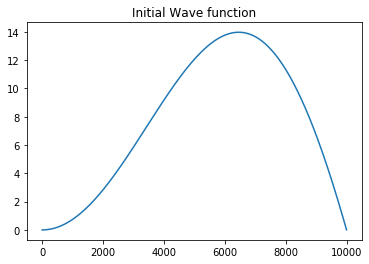

In [9]:
A = (1/math.pow(a, 3/2)) * (math.sqrt((12*pi2)/2*pi2-3))

phix0 = []

for x in np.arange(0, 1, .0001 ):
    phix0.append( A * x * math.sin((math.pi * x) /a))
    
plt.plot(phix0)
plt.title("Initial Wave function")
plt.show()

this plot shows the initial wave function of the initial wave function at time equals 0.

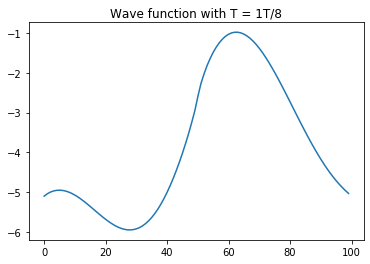

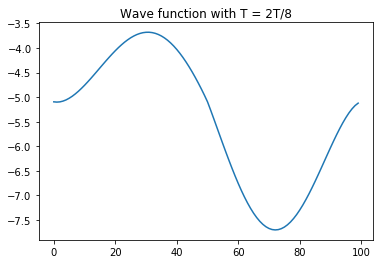

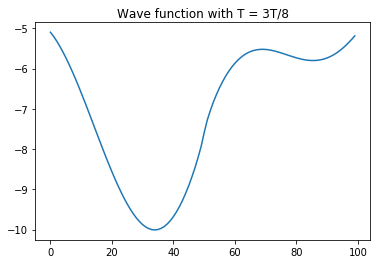

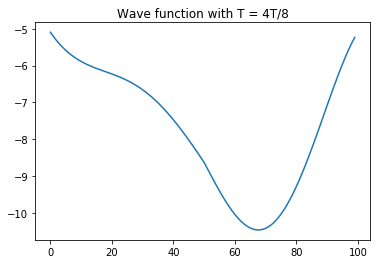

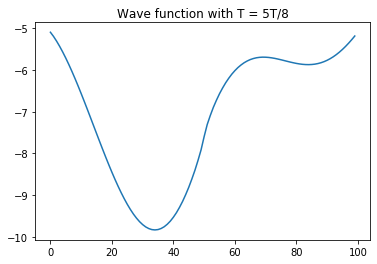

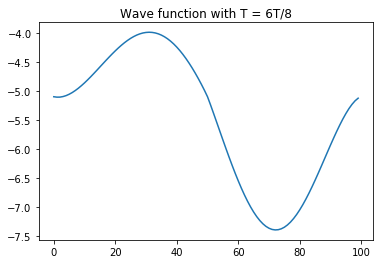

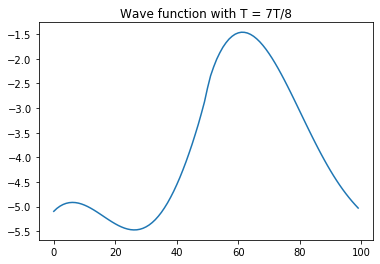

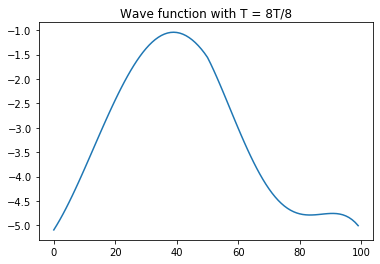

In [8]:
alpha = (1/2) * math.sqrt((6*pi2)/(2*pi2 - 3)) * math.sqrt(2/a) 

beta = (1/pi2) * math.sqrt((24*pi2)/(2*pi2 -3)) * math.sqrt(2/a) 

def sum1 ( pos, t):
    sum1 = 0
    for n in range(0,200,2):
        sum1 += ((1/(n-1) ** 2) - (1/(n-1) ** 2) * 
                math.sin((math.pi*pos)/a) * 
                math.sin((math.pi*pos *n)/a) * math.cos(omega * (t/8)) *
                math.cos(n**2 * omega * t))
    return sum1
    
def sum2 (pos,t):
    sum2 = 0
    for n in range(0,200,2):
        sum2 += ((1/(n-1) ** 2) - (1/(n-1) ** 2) * 
                (math.sin((n*math.pi * pos)/a)**2) * 
                (math.cos(n**2 *omega * t) )**2)
    return sum2
                
for t in range(1,9):
    phiPD = []
    for x in np.arange(0, 1, .0001 ):
        phiPD.append( 2 *((alpha**2) * math.sin((math.pi*x)/a) *
                          math.cos(omega * (t*T/8)) -
                          2*alpha*beta * sum1(x,t*T/8) + 
                          beta**2 * sum2(x, t*T/8)))

    #ax = fig.add_subplot(Rows,Cols,Position[t])
    #ax.plot(x,x%2)
        
    plt.plot(phiPD)
    plt.title("Wave function with T = " + str(t) + "T/8");
    plt.show()          
#plt.show()

In [ ]:
 TotalSteps = 1000
 for t in range(TotalSteps+1):
     
     phiPD = []
     for x in np.arange(0, 1, .001 ):
         phiPD.append( 2 *((alpha**2) * math.sin((math.pi*x)/a) *
                           math.cos(omega * (t*T/TotalSteps)) -
                           2*alpha*beta * sum1(x,t*T/TotalSteps) + 
                           beta**2 * sum2(x, t*T/TotalSteps)))
 
     #ax = fig.add_subplot(Rows,Cols,Position[t])
     #ax.plot(x,x%2)
         
     plt.plot(phiPD, color='dodgerblue')
     plt.title("Wave function with T = " + str(t) + "T/" + str(TotalSteps))
     num = str(t).rjust(4,'0')
     plt.savefig("../pics/" + num +".png")
     plt.clf()
print("complete")
# Create gif

In [ ]:
# Create the frames
frames = []
imgs = glob.glob("../pics//*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('../gif/P.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=30, loop=0)

print("complete")